# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import time

%matplotlib inline
sns.set(color_codes=True)

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.memory_usage', None)
# pd.set_option('display.width', None)

import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
df = pd.read_csv('Advertising.csv') # Dataframe yang diberikan
df.drop(['Radio','Newspaper'], axis = 1, inplace =True)
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


# Exploratory Data Analysis(EDA)
Let's create some simple plots to check out the data!

<AxesSubplot:xlabel='TV', ylabel='Sales'>

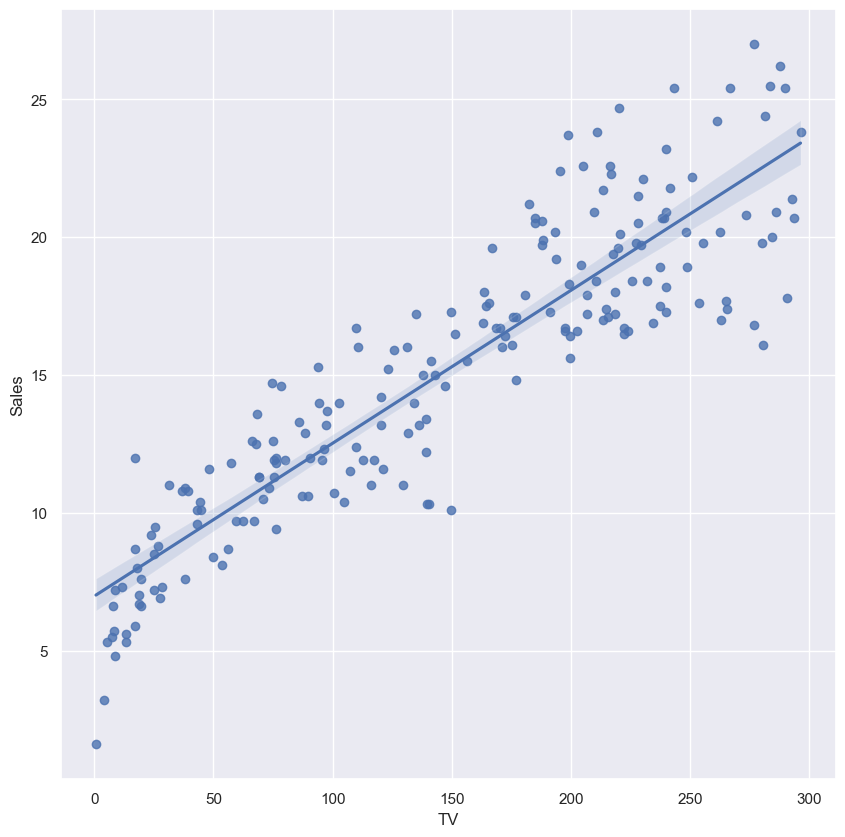

In [6]:
plt.figure(figsize=(10,10))
sns.regplot(x='TV',y='Sales',data=df)

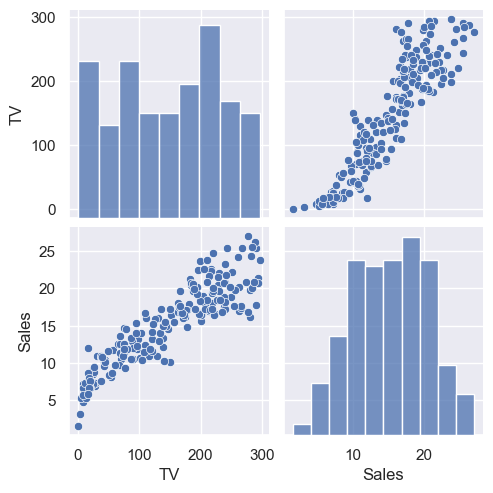

In [7]:
sns.pairplot(df)

<AxesSubplot:>

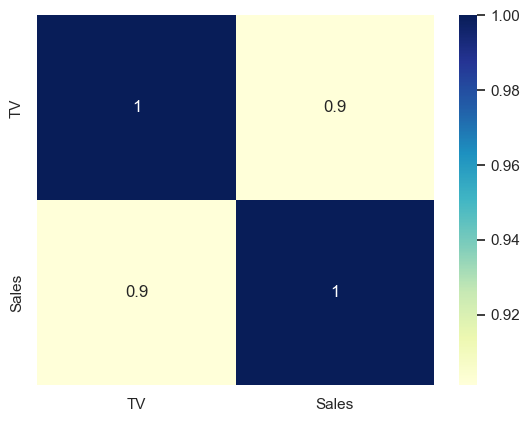

In [8]:
correlations = df.corr()

indx=correlations.index
sns.heatmap(df[indx].corr(),annot=True,cmap="YlGnBu")

# Using SK-learn Linear Regression

## Train Test Split for Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an df array that contains the part of dataset used for training data, and a df array used for test data.

In [9]:
scaler = StandardScaler()

In [10]:
#scaling the training data(fitting the parameters and transforming the values)
df = scaler.fit_transform(df)

In [11]:
# Kolom untuk DataFrame
columns = ['TV', 'Sales']

# Membuat DataFrame dari array dengan kolom yang telah ditentukan
df = pd.DataFrame(df, columns=columns)

# Menampilkan DataFrame yang telah dibuat
df

,TV,Sales
0,0.969852,1.322319
1,-1.197376,-0.897515
2,-1.516155,-0.593948
3,0.052050,0.259834
4,0.394182,0.525455
...,...,...
195,-1.270941,-1.428757
196,-0.617035,-0.214489
197,0.349810,-0.062706
198,1.594565,1.967398


In [12]:
# Memisahkan fitur (X) dan target (y)
X = df[['TV']]  # Fitur
y = df['Sales']  # Target

# Melakukan train-test split dengan rasio 80:20 untuk train:test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Menampilkan ukuran dari setiap subset
print("Jumlah data dalam X_train:", len(X_train))
print("Jumlah data dalam X_test:", len(X_test))
print("Jumlah data dalam y_train:", len(y_train))
print("Jumlah data dalam y_test:", len(y_test))

Jumlah data dalam X_train: 140
Jumlah data dalam X_test: 60
Jumlah data dalam y_train: 140
Jumlah data dalam y_test: 60


## Creating and Training the Model

- Using Linear Regression Method

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.[](http://)

In [16]:
# print the intercept of best-fit line
print(lr.intercept_)

0.026393808576713362


## Interpreting the coefficients:

In [17]:
# Membuat DataFrame untuk menampilkan koefisien dari model
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

In [18]:
coeff_df

,Coefficient
TV,0.890973


## Predictions from our Model
Let's grab predictions off our test set and see how well it did!

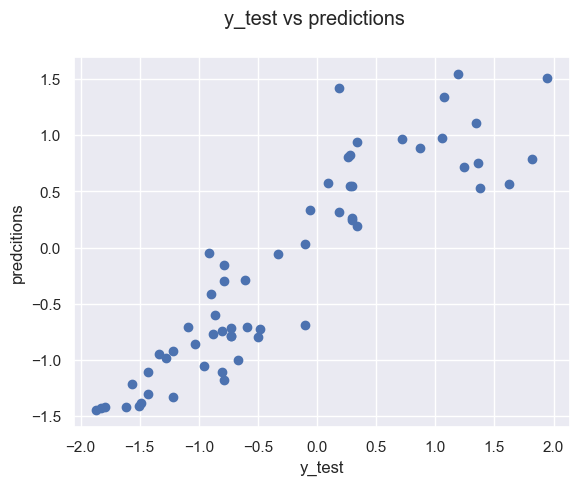

In [19]:
predictions = lr.predict(X_test)

fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

In [20]:
predictions

array([ 0.19553337,  0.52949492,  1.54386411, -1.38168067,  0.7885492 ,
       -0.72208061,  0.75213595, -0.98321565,  0.81039715,  0.31829805,
       -1.1756857 , -0.91871217,  0.93628297, -1.44722453, -0.05207675,
        0.2673195 , -1.42745734,  0.55238325, -0.71999985,  0.96645395,
        0.88426404, -0.79802825, -1.10806109,  1.10690507, -0.7855437 ,
       -0.9468024 ,  0.71780345, -0.05415751, -0.59619479, -1.41601317,
        0.57527158, -0.78346295,  0.56590817, -1.32758098,  1.41693791,
        0.97477698, -1.00090209,  1.34411141, -0.28408119, -1.21730085,
       -0.29656574,  0.33806524, -1.05500178, -0.85524907,  0.82704321,
       -1.10598033, -0.76889765,  0.02907278, -0.4151689 , -0.70959606,
       -0.68982887,  0.24859268, -1.41289203, -1.42225544, -0.70855568,
       -0.157155  , -0.73976704,  1.51057199, -1.29949076,  0.55238325])

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.34282430123859714
MSE: 0.1864485372448441
RMSE: 0.4317968703509141


In [23]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.814855389208679

## Plot Result Dari Regression Linear Sk-Learn

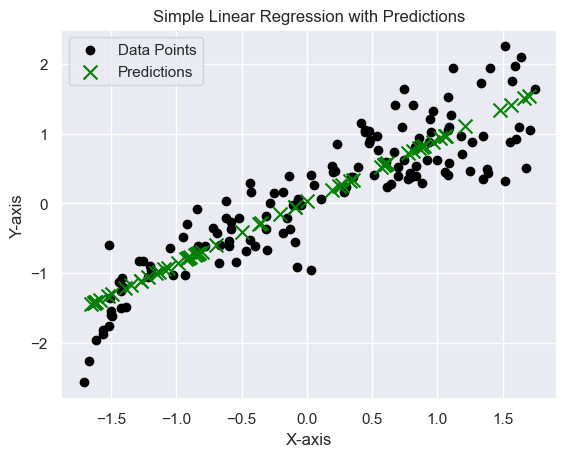

In [24]:
# Make predictions
x_new = X_test
y_pred = predictions

# Plot the regression line and predictions
plt.scatter(X_train, y_train, color='black', marker='o', label='Data Points')
# plt.plot(x_data_large, slope_large * x_data_large + intercept_large, color='blue', linewidth=2, label='Regression Line')
plt.scatter(x_new, y_pred, color='green', marker='x', s=100, label='Predictions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Linear Regression with Predictions')
plt.legend()
plt.show()

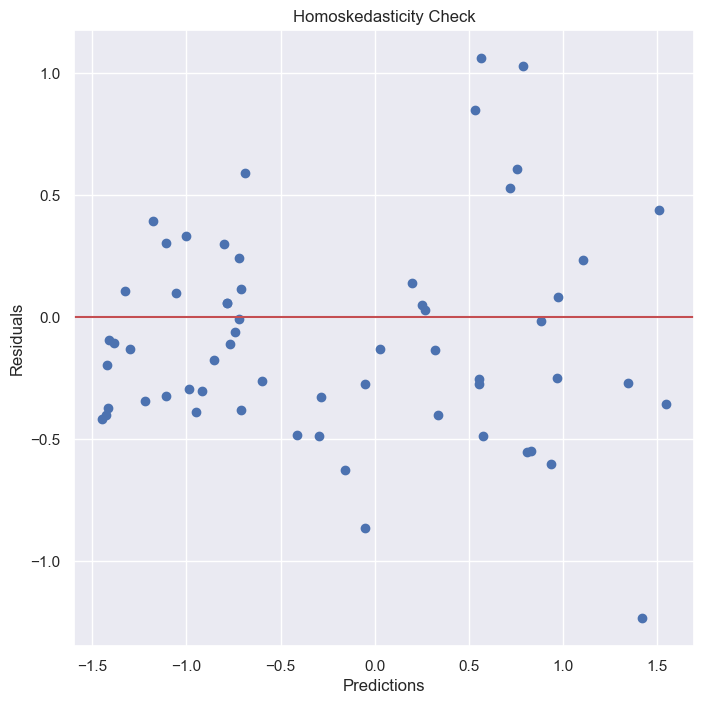

In [29]:
# Uji Asumsi 1: Homoskedastisitas
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test - predictions)
plt.title('Homoskedasticity Check')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

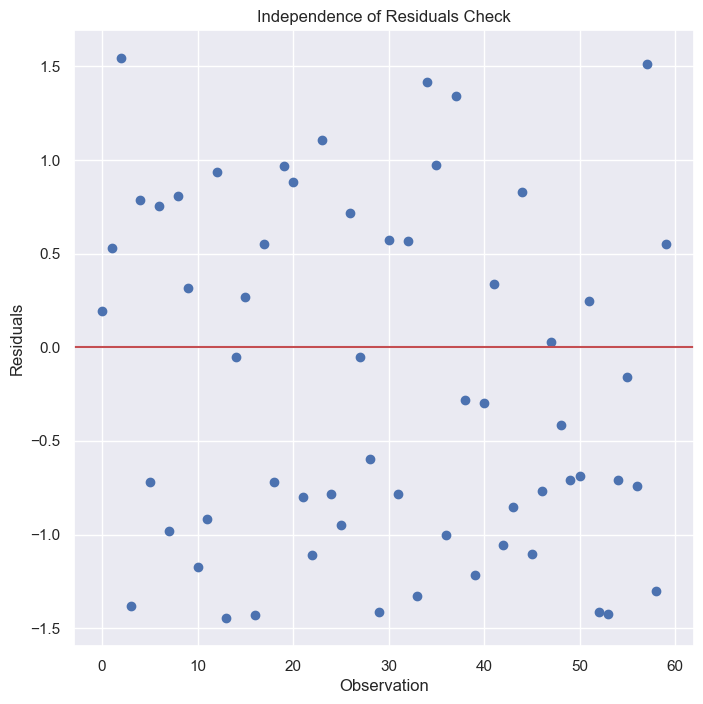

In [30]:
# Uji Asumsi 2: Independence of Residuals
plt.figure(figsize=(8,8))
plt.plot(predictions, marker='o', linestyle='None')
plt.title('Independence of Residuals Check')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

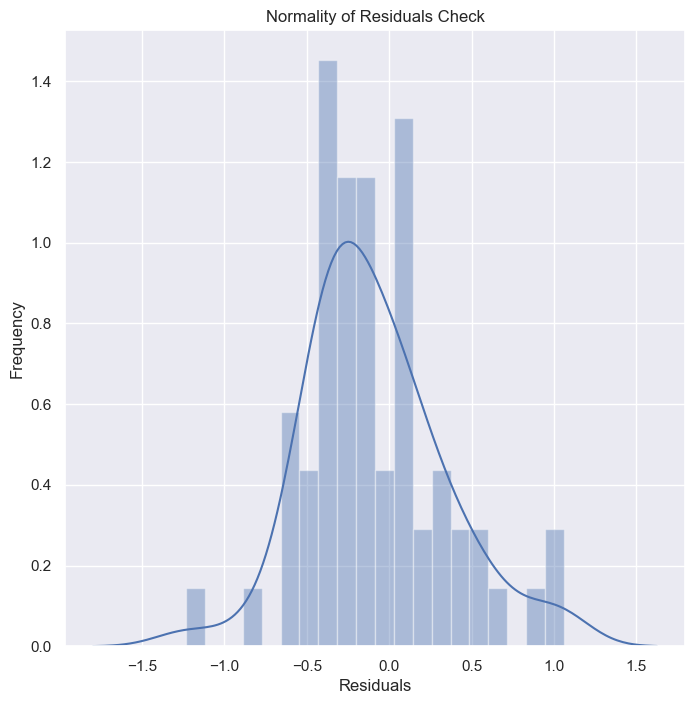

In [31]:
# Uji Asumsi 3: Normalitas Residual
plt.figure(figsize=(8,8))
sns.distplot((y_test - predictions), bins=20)
plt.title('Normality of Residuals Check')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

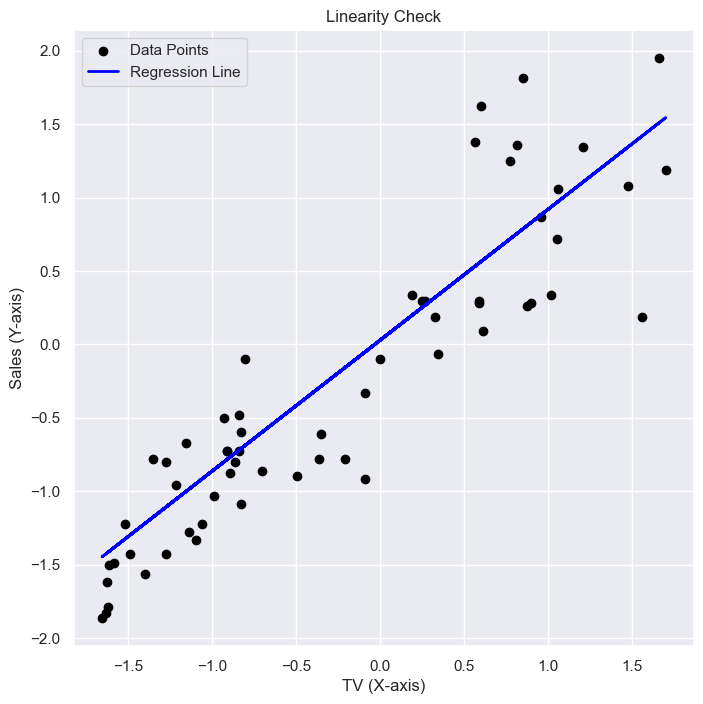

In [33]:
# Uji Asumsi 4: Linearity
plt.figure(figsize=(8,8))
plt.scatter(X_test['TV'], y_test, color='black', marker='o', label='Data Points')
plt.plot(X_test['TV'], predictions, color='blue', linewidth=2, label='Regression Line')
plt.title('Linearity Check')
plt.xlabel('TV (X-axis)')
plt.ylabel('Sales (Y-axis)')
plt.legend()
plt.show()
